In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
%matplotlib inline
%autosave 2

Autosaving every 2 seconds


In [3]:
df = pd.read_csv("ex2data2.txt", header=None)
df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
df.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


Imported libraries, learned statistical figures regarding data

In [5]:
data = df.values

In [6]:
X = data[:, :-1]
y = data[:, -1]

In [7]:
m, n = X.shape

Divided data into X, and y and stored the number of rows and features in m and n respectively. 

In [8]:
pos, neg = (y==1).reshape(m, 1), (y==0).reshape(m, 1)

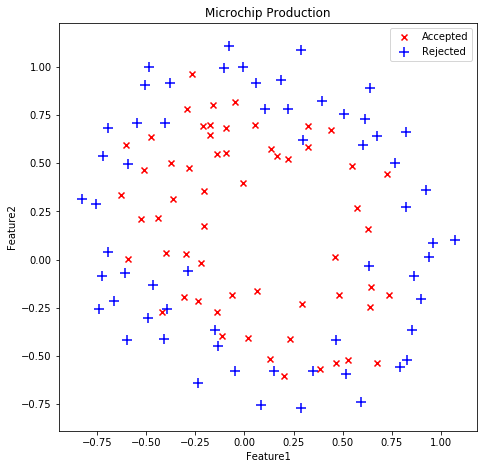

In [9]:
plt.figure(figsize=(7.5, 7.5))
plt.scatter(X[pos[:, 0], 0], X[pos[:, 0], 1], color='red', marker='x')
plt.scatter(X[neg[:, 0], 0], X[neg[:, 0], 1], color='blue', marker='+',s=110)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Microchip Production")
plt.legend(["Accepted", "Rejected"], loc=0)
plt.show()

Plotted the data. As we can see from the plot, the decision boundary is non linear. NOT A STRAIGHT LINE. Thus, we will polynomial features. 

Now, we will start building models on our data. As always, first, we will build models using off the shelf libraries based on sklearn. We will do it first before adding the polynomial features and then do it with polynomial features. 

For this exercise, we will use almost the possible options. We will build each model two times, one with only features included in the dataset, and other with polynomial features. Also, we will use all the regularisation techniques offered by python, namely l1:Lasso, l2:Ridge, ElasticNet. Lasso can reduce to coefficients to 0, while Ridge can't. ElasticNet is a combination of both. 

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X_poly = poly.fit_transform(X)

Imported the metric we will use for evaluation of the model, and made X_poly, which includes polynomial features. 

In [11]:
from sklearn.linear_model import LogisticRegressionCV
lr_nopoly = LogisticRegressionCV(max_iter=10000)
lr_poly = LogisticRegressionCV(max_iter=10000)
lr_nopoly_l1 = LogisticRegressionCV(penalty='l1', solver='liblinear', max_iter=10000)
lr_nopoly_l2 = LogisticRegressionCV(penalty='l2', max_iter=10000)
lr_poly_l1 = LogisticRegressionCV(penalty='l1', solver='liblinear', max_iter=10000)
lr_poly_l2 = LogisticRegressionCV(penalty='l2', max_iter=10000)
lr_nopoly_en = LogisticRegressionCV(solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.3, 0.5, 0.7, 0.9], max_iter=10000)
lr_poly_en = LogisticRegressionCV(solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.3, 0.5, 0.7, 0.9], max_iter=10000)

Made an object of all the models, with appropriate arguments. 

In [12]:
lr_nopoly.fit(X, y)
lr_poly.fit(X_poly, y)
lr_nopoly_l1.fit(X, y)
lr_poly_l1.fit(X_poly, y)
lr_nopoly_l2.fit(X, y)
lr_poly_l2.fit(X_poly, y)
lr_nopoly_en.fit(X, y)
lr_poly_en.fit(X_poly, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=[0.1, 0.3, 0.5, 0.7, 0.9], max_iter=10000,
                     multi_class='auto', n_jobs=None, penalty='elasticnet',
                     random_state=None, refit=True, scoring=None, solver='saga',
                     tol=0.0001, verbose=0)

In [13]:
yr_nopoly = lr_nopoly.predict(X)
yr_poly = lr_poly.predict(X_poly)
yr_nopoly_l1 = lr_nopoly_l1.predict(X)
yr_poly_l1 = lr_poly_l1.predict(X_poly)
yr_nopoly_l2 = lr_nopoly_l2.predict(X)
yr_poly_l2 = lr_poly_l2.predict(X_poly)
yr_nopoly_en = lr_nopoly_en.predict(X)
yr_poly_en = lr_poly_en.predict(X_poly)

Fitted all the models to respective data, and predicted the output using .predict for all the models. 

In [14]:
accuracies = [[accuracy_score(y, yr_nopoly)*100, accuracy_score(y, yr_poly)*100], [accuracy_score(y, yr_nopoly_l1)*100, accuracy_score(y, yr_poly_l1)*100], [accuracy_score(y, yr_nopoly_l2)*100, accuracy_score(y, yr_poly_l2)*100], [accuracy_score(y, yr_nopoly_en)*100, accuracy_score(y, yr_poly_en)*100]]

Made data of all the accuracies so can feed the dataframe and can understand the data efficiently. 

In [15]:
scores = pd.DataFrame(data=accuracies, index=['Logistic Regression', 'Lasso', 'Ridge', 'ElasticNet'], columns=['Without Polynomial features', 'With Polynomial features'])
scores

,Without Polynomial features,With Polynomial features
Logistic Regression,50.847458,86.440678
Lasso,50.847458,84.745763
Ridge,50.847458,86.440678
ElasticNet,50.847458,83.898305


As we can see, without polynomial features, it doesn't do a very great deal at predicting. Also, with polynomial features, normal Logistic Regression does the best. It's accuracy is the highest and also, causes lease amount of fuzz. 

And, what we have observed, that Ridge technique is the default method for Regularisation in python. Thus, the scores obtained by normal Logistic Regression and the Ridge is the same. Alse, elastic net may perform better on larger datasets, but certainly performs poorly in our case. 

Now that we have made almost all possible models using off the shelf method, we will start building models by scratch and will try if we can make a better model than current best of 86.44%

In [16]:
n = X_poly.shape[1]
ini_theta = np.zeros((n, 1))
y = y.reshape(m, 1)

In [17]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
sigmoid(0)

0.5

In [18]:
def costFunction(theta, X, y, reg_param):
    #reg_param = 1
    m = len(y)
    predictions = sigmoid(X @ theta)
    J = sum((-y * np.log(predictions))-((1-y) * np.log(1 - predictions))) / m
    J += (reg_param / (2 * m)) * sum(theta[1:] ** 2)
    return J

In [19]:
costFunction(ini_theta, X_poly, y, 1), ini_theta.shape

(array([0.69314718]), (28, 1))

In [20]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [21]:
def grad(theta, X, y, reg_param):
    #reg_param = 1
    m = len(y)
    predictions = sigmoid(X @ theta)
    error = predictions - y
    grad_term = X.transpose() @ error
    grad0 = grad_term[0] / m
    grad12n = ((grad_term[1:]) / m) + ((reg_param / m) * theta[1:])
    grad = np.append(grad0, grad12n).reshape(theta.shape)
    return grad

In [22]:
gradient = grad(ini_theta, X_poly ,y, 1)
gradient

array([[8.47457627e-03],
       [1.87880932e-02],
       [7.77711864e-05],
       [5.03446395e-02],
       [1.15013308e-02],
       [3.76648474e-02],
       [1.83559872e-02],
       [7.32393391e-03],
       [8.19244468e-03],
       [2.34764889e-02],
       [3.93486234e-02],
       [2.23923907e-03],
       [1.28600503e-02],
       [3.09593720e-03],
       [3.93028171e-02],
       [1.99707467e-02],
       [4.32983232e-03],
       [3.38643902e-03],
       [5.83822078e-03],
       [4.47629067e-03],
       [3.10079849e-02],
       [3.10312442e-02],
       [1.09740238e-03],
       [6.31570797e-03],
       [4.08503006e-04],
       [7.26504316e-03],
       [1.37646175e-03],
       [3.87936363e-02]])

In [23]:
import scipy.optimize as opt
#X_poly.shape, y.shape
result = opt.fmin_tnc(func=costFunction, x0=ini_theta.flatten(), fprime=grad, args=(X_poly, y.flatten(), 1))
result2 = opt.fmin_bfgs(f=costFunction, x0=ini_theta.flatten(), fprime=grad, args=(X_poly, y.flatten(), 1))
result3 = opt.fmin_ncg(f=costFunction, x0=ini_theta.flatten(), fprime=grad, args=(X_poly, y.flatten(), 1))

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 82
         Hessian evaluations: 0


In [29]:
result3

array([ 1.27273765,  0.62527309,  1.18108936, -2.01995763, -0.91742342,
       -1.43166523,  0.12400444, -0.36553459, -0.35724045, -0.17513215,
       -1.45815552, -0.05098915, -0.61555342, -0.27470743, -1.1928128 ,
       -0.2421887 , -0.20600598, -0.04473065, -0.27778428, -0.2953771 ,
       -0.45635656, -1.04320119,  0.02777144, -0.29243063,  0.01556688,
       -0.32737958, -0.14388674, -0.92465099])

In [30]:
fin_theta = result3
fin_theta = fin_theta.reshape(ini_theta.shape)
fin_theta.shape

(28, 1)

In [31]:
y_cml = classifierPredict(fin_theta, X_poly)
score_cml = accuracy_score(y, y_cml)
score_cml

0.8305084745762712

In [26]:
fin_theta2 = result2.reshape(ini_theta.shape)
fin_theta2.shape

(28, 1)

In [27]:
y_cml2 = classifierPredict(fin_theta2, X_poly)
score_cml2 = accuracy_score(y, y_cml2)
score_cml2

0.8305084745762712